In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt
from scipy.special import kl_div

Text(0, 0.5, 'Resistance Marker')

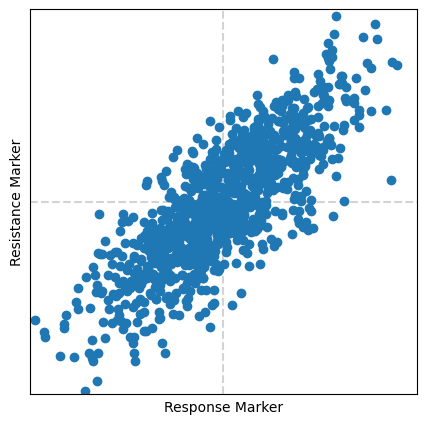

In [2]:
fig, ax = plt.subplots(1, figsize=(5, 5))

samples = np.random.multivariate_normal([0.0, 0.0], [[1.0, 0.8], [0.8, 1.0]], size=1000)

ax.axvline(0, linestyle="--", color="lightgray", zorder=0)
ax.axhline(0, linestyle="--", color="lightgray", zorder=0)

ax.scatter(samples[:, 0], samples[:, 1])

ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-3.0, 3.0)

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlabel("Response Marker")
ax.set_ylabel("Resistance Marker")

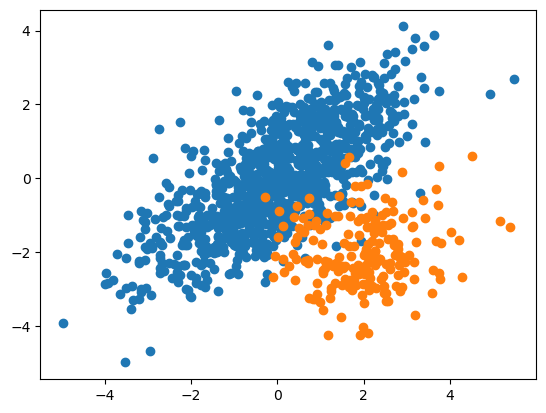

In [3]:
s = np.array([[2.0, 0.0], [0.0, 2.0]])
cor = np.array([[1.0, 0.7], [0.7, 1.0]])
cov = np.matmul(s, cor,  s)

background = np.random.multivariate_normal([0.0, 0.0], cov, size=1000)

responder_variable = np.random.normal(2.0, 1.0, size=200)
resistant_variable = np.random.normal(-2.0, 1.0, size=200)

plt.scatter(background[:, 0], background[:, 1] )
plt.scatter(responder_variable, resistant_variable)

In [4]:
from numpy import var, mean, sqrt
from pandas import Series

def cohend(d1: Series, d2: Series) -> float:

    # calculate the size of samples
    n1, n2 = len(d1), len(d2)

    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)

    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)

    # return the effect size
    return (u1 - u2) / s

In [5]:
cohend(background[:, 0], responder_variable)

-1.3855852725808273

In [6]:
cohend(background[:, 1], resistant_variable)

1.4837956426357242

In [7]:
samples = np.vstack([background, np.hstack([responder_variable.reshape(-1, 1), resistant_variable.reshape(-1, 1)])])

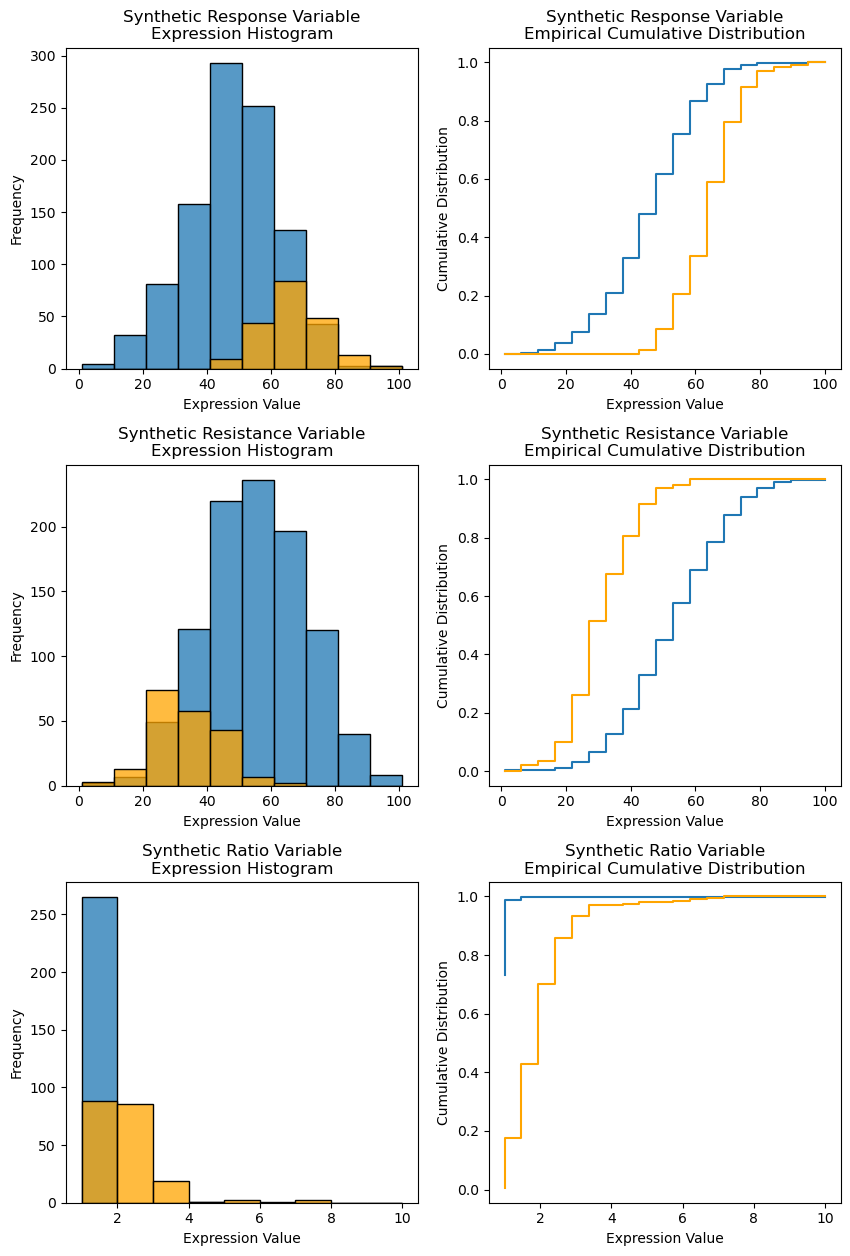

In [8]:
from sklearn.preprocessing import MinMaxScaler

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
xs = np.linspace(1, 100, 20)

#
# Response
#

scaler = MinMaxScaler((1, 100))
response_variable_background = scaler.fit_transform(samples[:, 0].reshape(-1, 1))

sns.histplot(response_variable_background[0:1000].ravel(), ax=axes[0, 0], label="Response Variable", bins=20, binwidth=10.0, binrange=(1, 100), zorder=0)
sns.histplot(response_variable_background[1000:].ravel(), ax=axes[0, 0], label="Response Variable", bins=20, binwidth=10.0, binrange=(1, 100), color="orange", zorder=3)

axes[0,0].set_title("Synthetic Response Variable\nExpression Histogram")
axes[0,0].set_xlabel("Expression Value")
axes[0,0].set_ylabel("Frequency")

ecdf = sm.distributions.ECDF(response_variable_background[0:1000].ravel())
axes[0, 1].step(xs, ecdf(xs), label="Background")

ecdf = sm.distributions.ECDF(response_variable_background[1000:].ravel())
axes[0, 1].step(xs, ecdf(xs), label="Background", color='orange')

axes[0,1].set_title("Synthetic Response Variable\nEmpirical Cumulative Distribution")
axes[0,1].set_xlabel("Expression Value")
axes[0,1].set_ylabel("Cumulative Distribution")

#
# Resistance
#

scaler = MinMaxScaler((1, 100))
resistance_variable_background = scaler.fit_transform(samples[:, 1].reshape(-1, 1))

#sns.histplot(resistance_variable_background.ravel(), ax=axes[1, 0], label="Resistance Variable", bins=20, binwidth=10.0, binrange=(1, 100))
sns.histplot(resistance_variable_background[0:1000].ravel(), ax=axes[1, 0], label="Resistance Variable", bins=20, binwidth=10.0, binrange=(1, 100))
sns.histplot(resistance_variable_background[1000:].ravel(), ax=axes[1, 0], label="Resistance Variable", bins=20, binwidth=10.0, binrange=(1, 100), color="orange")

axes[1,0].set_title("Synthetic Resistance Variable\nExpression Histogram")
axes[1,0].set_xlabel("Expression Value")
axes[1,0].set_ylabel("Frequency")

ecdf = sm.distributions.ECDF(resistance_variable_background[0:1000].ravel())
axes[1, 1].step(xs, ecdf(xs), label="Background")

ecdf = sm.distributions.ECDF(resistance_variable_background[1000:].ravel())
axes[1, 1].step(xs, ecdf(xs), label="Background", color='orange')

axes[1,1].set_title("Synthetic Resistance Variable\nEmpirical Cumulative Distribution")
axes[1,1].set_xlabel("Expression Value")
axes[1,1].set_ylabel("Cumulative Distribution")


#
# Ratios
#

ratios = response_variable_background / resistance_variable_background
#sns.histplot(ratios, ax=axes[2, 0], label="Ratio Transformation", bins=10, binwidth=1.0, binrange=(1, 10))
sns.histplot(ratios[:1000].ravel(), ax=axes[2, 0], label="Ratio Transformation", bins=10, binwidth=1.0, binrange=(1, 10))
sns.histplot(ratios[1000:].ravel(), ax=axes[2, 0], label="Ratio Transformation", bins=10, binwidth=1.0, binrange=(1, 10), color="orange")

axes[2,0].set_title("Synthetic Ratio Variable\nExpression Histogram")
axes[2,0].set_xlabel("Expression Value")
axes[2,0].set_ylabel("Frequency")

xs = np.linspace(1, 10, 20)
ecdf = sm.distributions.ECDF(ratios[:1000].ravel())
axes[2, 1].step(xs, ecdf(xs), label="Background")

ecdf = sm.distributions.ECDF(ratios[1000:].ravel())
axes[2, 1].step(xs, ecdf(xs), label="Background", color='orange')

axes[2,1].set_title("Synthetic Ratio Variable\nEmpirical Cumulative Distribution")
axes[2,1].set_xlabel("Expression Value")
axes[2,1].set_ylabel("Cumulative Distribution")

plt.subplots_adjust(hspace=0.3)

plt.savefig("../../figures/synthetic/concept-figure-cumulative-distributions.svg",
            format="svg",
            bbox_inches='tight')

In [9]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

p value for norm = 0.49885960959734266


/opt/conda/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 0.47883320780376515
p value for pareto = 1.98950790674015e-114
p value for genextreme = 0.0
Best fitting distribution: norm
Best p value: 0.49885960959734266
Parameters for the best fit: (48.35649276910329, 13.971113057649115)
p value for norm = 0.8546877690201541
p value for exponweib = 1.888566955301451e-91
p value for weibull_max = 1.5826308694437324e-144
p value for weibull_min = 0.5497931820229252
p value for pareto = 1.2223452092336926e-12
p value for genextreme = 0.436604256374849
Best fitting distribution: norm
Best p value: 0.8546877690201541
Parameters for the best fit: (66.84850971082754, 9.53691064640177)
p value for norm = 0.6719600121562841
p value for exponweib = 0.1703194575155631
p value for weibull_max = 0.0
p value for weibull_min = 0.35195079079603053
p value for pareto = 6.424124204709196e-128
p value for genextreme = 0.0
Best fitting distribution: norm
Best p value: 0.6719600121562

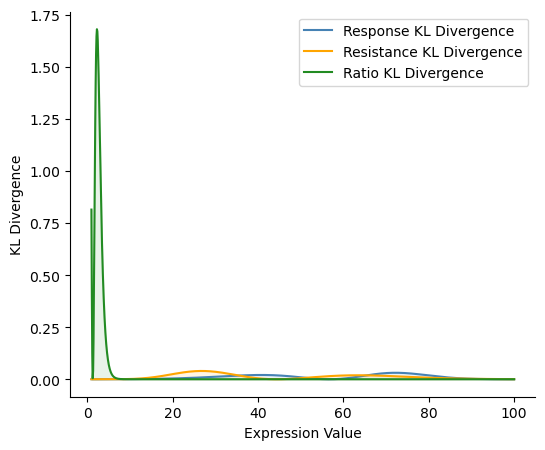

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# Response Variable

xs = np.linspace(1, 100, 1000)

response_background_dist, _, response_background_params = get_best_distribution(response_variable_background[:1000].ravel())
response_hit_dist, _, response_hit_params = get_best_distribution(response_variable_background[1000:].ravel())
response_kl_div = kl_div(getattr(st, response_hit_dist)(*response_hit_params).pdf(xs), getattr(st, response_background_dist)(*response_background_params).pdf(xs))

ax.plot(xs, response_kl_div, label="Response KL Divergence", color="steelblue")
ax.fill_between(xs, response_kl_div, alpha=0.1, color='steelblue') 

xs = np.linspace(1, 100, 1000)

resistance_background_dist, _, resistance_background_params = get_best_distribution(resistance_variable_background[:1000].ravel())
resistance_hit_dist, _, resistance_hit_params = get_best_distribution(resistance_variable_background[1000:].ravel())
resistance_kl_div = kl_div(getattr(st, resistance_hit_dist)(*resistance_hit_params).pdf(xs), getattr(st, resistance_background_dist)(*resistance_background_params).pdf(xs))


ax.plot(xs, resistance_kl_div, label="Resistance KL Divergence", color="orange")
ax.fill_between(xs, resistance_kl_div, alpha=0.1, color='orange') 

xs = np.linspace(1, 100, 1000)

ratio_background_dist, _, ratio_background_params = get_best_distribution(ratios[:1000].ravel())
ratio_hit_dist, _, ratio_hit_params = get_best_distribution(ratios[1000:].ravel())

ratio_kl_div = kl_div(getattr(st, ratio_hit_dist)(*ratio_hit_params).pdf(xs),
                      getattr(st, ratio_background_dist)(*ratio_background_params).pdf(xs)
                     )

ax.plot(xs, ratio_kl_div, label="Ratio KL Divergence", color="forestgreen")
ax.fill_between(xs, ratio_kl_div, alpha=0.1, color='forestgreen') 

ax.legend()
ax.set_ylabel("KL Divergence")
ax.set_xlabel("Expression Value")

sns.despine()

plt.savefig("../../figures/synthetic/concept-figure-kl-divergence-curve.svg",
            format="svg",
            bbox_inches="tight")

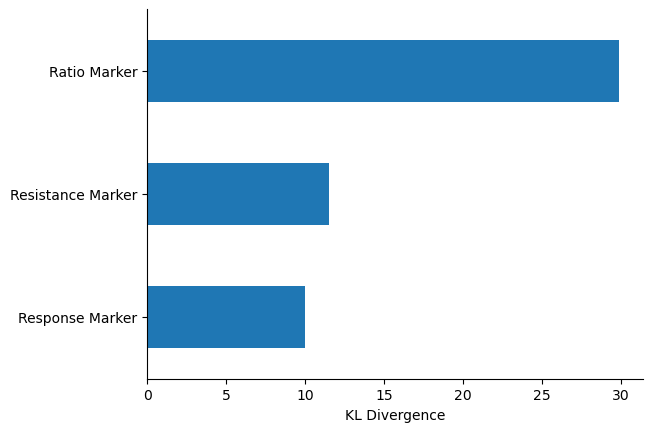

In [11]:
pd.DataFrame(data=[sum(response_kl_div[np.isfinite(resistance_kl_div)]), 
                   sum(resistance_kl_div[np.isfinite(resistance_kl_div)]), 
                   sum(ratio_kl_div[np.isfinite(ratio_kl_div)])],
             index=["Response Marker",
                    "Resistance Marker",
                    "Ratio Marker"],
             columns=["KL Divergence"]).plot(kind="barh", legend=None)

plt.xlabel("KL Divergence")

sns.despine()

plt.savefig("../../figures/synthetic/concept-figure-kl-divergence-barplot.svg",
            format="svg",
            bbox_inches="tight")